<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных-с-Yahoo.Finance" data-toc-modified-id="Загрузка-данных-с-Yahoo.Finance-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных с Yahoo.Finance</a></span><ul class="toc-item"><li><span><a href="#Разделение-временного-ряда" data-toc-modified-id="Разделение-временного-ряда-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Разделение временного ряда</a></span></li></ul></li><li><span><a href="#Описательные-статистики" data-toc-modified-id="Описательные-статистики-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Описательные статистики</a></span></li><li><span><a href="#Автоподбор-параметров-модели-методом-минимизации-AIC" data-toc-modified-id="Автоподбор-параметров-модели-методом-минимизации-AIC-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Автоподбор параметров модели методом минимизации AIC</a></span></li><li><span><a href="#Построение-модели-и-подгонка-кривой" data-toc-modified-id="Построение-модели-и-подгонка-кривой-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Построение модели и подгонка кривой</a></span></li><li><span><a href="#Прогнозирование" data-toc-modified-id="Прогнозирование-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Прогнозирование</a></span></li><li><span><a href="#Дополнительно-изученное**" data-toc-modified-id="Дополнительно-изученное**-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Дополнительно изученное**</a></span><ul class="toc-item"><li><span><a href="#Обработка-данных" data-toc-modified-id="Обработка-данных-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Обработка данных</a></span></li><li><span><a href="#Скользящие-статистики" data-toc-modified-id="Скользящие-статистики-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Скользящие статистики</a></span></li><li><span><a href="#Кривая-скользящей-статистики" data-toc-modified-id="Кривая-скользящей-статистики-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Кривая скользящей статистики</a></span></li><li><span><a href="#Замена-формата-даты-времени-на-адату-в-американском-стиле" data-toc-modified-id="Замена-формата-даты-времени-на-адату-в-американском-стиле-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Замена формата даты-времени на адату в американском стиле</a></span></li></ul></li></ul></div>

# Загрузка данных с Yahoo.Finance

In [1]:
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt

ALRS.ME_data.head(): 
Attributes  Adj Close      Close       High        Low       Open      Volume
Symbols       ALRS.ME    ALRS.ME    ALRS.ME    ALRS.ME    ALRS.ME     ALRS.ME
Date                                                                         
2016-09-01  41.091286  75.699997  76.389999  75.459999  75.510002   7012000.0
2016-09-02  41.541828  76.529999  76.750000  74.699997  76.370003  10608100.0
2016-09-05  42.312630  77.949997  78.190002  76.550003  76.800003   7369500.0
2016-09-06  44.103924  81.250000  81.250000  77.800003  78.089996  18165200.0
2016-09-07  43.626251  80.370003  81.720001  80.220001  81.300003  14520400.0

ALRS.ME_data.tail(): 
Attributes   Adj Close       Close        High         Low        Open  \
Symbols        ALRS.ME     ALRS.ME     ALRS.ME     ALRS.ME     ALRS.ME   
Date                                                                     
2021-11-25  125.190002  125.190002  128.199997  124.639999  127.000000   
2021-11-26  121.300003  121.300003 

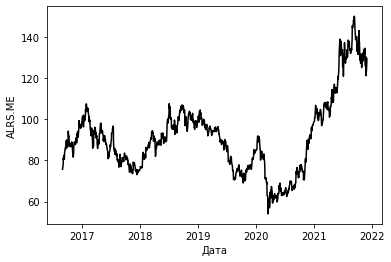

In [146]:
tickers = ['ALRS.ME']
data = pdr.data.DataReader(tickers, 'yahoo', '2016-9-01', '2021-12-01')
print(f'{tickers[0]}_data.head(): \n{data.head()}\n')
print(f'{tickers[0]}_data.tail(): \n{data.tail()}\n')
plt.plot('Close', data=data, color='black', linestyle='-')
plt.ylabel(f'{tickers[0]}')
plt.xlabel('Дата')
ALRS=data

## Разделение временного ряда

In [147]:
#Получаем временной ряд 2016-9-01 : 2021-10-01, т.е. до сентября включительнo
y=ALRS['2016-9':'2021-9'].Close
y

Symbols,ALRS.ME
Date,
2016-09-01,75.699997
2016-09-02,76.529999
2016-09-05,77.949997
2016-09-06,81.250000
2016-09-07,80.370003
...,...
2021-09-24,139.669998
2021-09-27,140.380005
2021-09-28,136.750000


In [219]:
#временной ряд за октябрь
y_future=ALRS.loc['2021-10'].Close
y_future

Symbols,ALRS.ME
Date,
2021-10-01,136.449997
2021-10-04,135.339996
2021-10-05,135.080002
2021-10-06,131.669998
2021-10-07,134.149994
2021-10-08,138.100006
2021-10-11,141.529999
2021-10-12,143.270004
2021-10-13,140.199997


# Описательные статистики

In [17]:
y.describe()

Symbols,ALRS.ME
count,1280.000000
mean,90.406062
std,17.331275
min,54.000000
25%,77.965000
50%,89.339996
75%,98.952501
max,150.270004


# Автоподбор параметров модели методом минимизации AIC

In [25]:
import pmdarima as pm 

In [19]:
from pmdarima.arima.stationarity import ADFTest

In [67]:
y=y.dropna()

In [68]:
# ADF - Augmented Dickey–Fuller test. Тест на единичной корень, т.е. стационарность
adf_test = ADFTest(alpha=0.05)
p_val, should_diff = adf_test.should_diff(y)

In [69]:
p_val, should_diff
# Не стационарный процесс. Нужно дифференцировать

(0.9114444418619679, True)

In [70]:
#d=1
from pmdarima.arima.utils import ndiffs
n_adf = ndiffs(y, test='adf')  # -> 0
n_adf 

1

In [71]:
auto = pm.auto_arima(y,stepwise=1,
                     suppress_warnings=True, max_p=6,max_P=4,max_D=4,
                     max_order=None, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=4782.527, Time=2.67 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4790.097, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4787.888, Time=0.20 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4788.080, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4789.141, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=4789.392, Time=0.88 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=4789.570, Time=0.85 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=4792.526, Time=1.95 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=4792.497, Time=1.88 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4789.607, Time=0.51 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=4791.207, Time=0.88 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=4791.291, Time=1.16 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=4786.492, Time=3.54 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=4781.524, Time=1.68 sec
 ARIMA(1,1,2)(0,0,0)[0]          

In [28]:
#Подобранные параметры ARIMA
auto.fit(y)

ARIMA(order=(2, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

# Построение модели и подгонка кривой

In [30]:
import statsmodels.api as sm

In [149]:
y=y.asfreq('d')
mod = sm.tsa.SARIMAX(y, order=(2, 1, 2), trend='c')
mod.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                ALRS.ME   No. Observations:                 1856
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -2441.070
Date:                Sat, 11 Dec 2021   AIC                           4894.140
Time:                        19:23:47   BIC                           4927.294
Sample:                    09-01-2016   HQIC                          4906.360
                         - 09-30-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0230      0.030      0.763      0.445      -0.036       0.082
ar.L1          0.8278      0.367      2.253      0.024       0.108       1.548
ar.L2         -0.5718      0.264     -2.165      0.030      -1.089      -0.054
ma.L1         -0.8803      0.366     -2.404      0.016      -1.598      -0.163
ma.L2          0.6076      0.250      2.428      0.015       0.117       1.098
sigma2         2.1201      0.057     37.375      0.000       2.009       2.231
===================================================================================
Ljung-Box (L1) (Q):                  13.59   Jarque-Bera (JB):              2050.43
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.46   Skew:                            -0.21
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [150]:
preds=mod.fit().predict()
preds=preds.to_frame()
preds

,predicted_mean
Date,
2016-09-01,0.030858
2016-09-02,75.730847
2016-09-03,76.519964
2016-09-04,76.543501
2016-09-05,76.591682
...,...
2021-09-26,139.777586
2021-09-27,139.826199
2021-09-28,140.400129


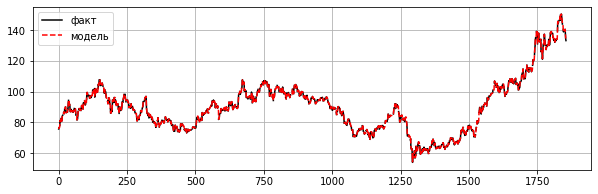

In [274]:
# preds.plot()

plt.figure(figsize=(10, 3))# plt.figure(6,8)
plt.plot(y.values,c='black',label='факт')
plt.plot(preds.values[1:],ls='--',c='r',label='модель')
plt.grid()
plt.legend()

In [203]:
#Стандартное отклонение прогноза
square_errors=(y["ALRS.ME"][1:]-preds['predicted_mean'][1:])**2
square_errors=square_errors.dropna()
st_otkl=(sum(square_errors)/len(square_errors))**(0.5)
st_otkl

1.5746361259267974

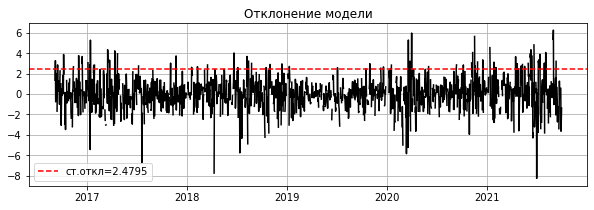

In [273]:
plt.figure(figsize=(10, 3))
plt.plot(y["ALRS.ME"][1:]-preds['predicted_mean'][1:],c='black')
plt.axhline(y=sum(square_errors)/len(square_errors), color='r', linestyle='--',
           label=f'cт.откл={round(sum(square_errors)/len(square_errors),4)}')
plt.grid()
plt.title('Отклонение модели')
plt.legend()

# Прогнозирование

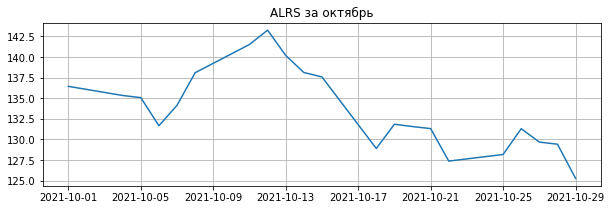

In [272]:
plt.figure(figsize=(10, 3))
y_without_na=y.dropna()
plt.plot(y_future)
plt.title('ALRS за октябрь')
plt.grid()

In [230]:
y_oct=mod.fit().forecast('2021-10-29')
y_oct

C:\Users\enkid\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


2021-10-01    133.177786
2021-10-02    133.075644
2021-10-03    132.986722
2021-10-04    132.994474
2021-10-05    133.074698
2021-10-06    133.159636
2021-10-07    133.207035
2021-10-08    133.220662
2021-10-09    133.227796
2021-10-10    133.248869
2021-10-11    133.285191
2021-10-12    133.326169
2021-10-13    133.362280
2021-10-14    133.391700
2021-10-15    133.418364
2021-10-16    133.446572
2021-10-17    133.477635
2021-10-18    133.510178
2021-10-19    133.542314
2021-10-20    133.573266
2021-10-21    133.603472
2021-10-22    133.633736
2021-10-23    133.664475
2021-10-24    133.695575
2021-10-25    133.726701
2021-10-26    133.757642
2021-10-27    133.788417
2021-10-28    133.819157
2021-10-29    133.849966
Freq: D, Name: predicted_mean, dtype: float64

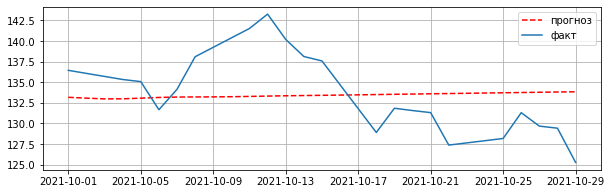

In [271]:
plt.figure(figsize=(10, 3))
plt.plot(y_oct,label='прогноз',ls='--',c='r')
plt.plot(y_future,label='факт')
plt.legend()
plt.grid()

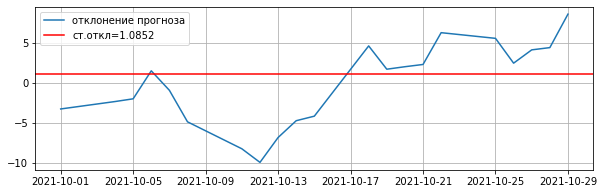

In [270]:
plt.figure(figsize=(10, 3))
y_oct_error=(y_oct.to_frame()['predicted_mean']-y_future['ALRS.ME'])
y_oct_error_without_na=y_oct_error.dropna()
st_er=np.sum(y_oct_error**2)**0.5/len(y_oct_error_without_na)
plt.plot(y_oct_error_without_na,label='отклонение прогноза')
plt.axhline(np.sum(y_oct_error**2)**0.5/len(y_oct_error_without_na),c='r',
            label=f'ст.откл={round(st_er,4)}')
plt.legend()
plt.grid()

# Дополнительно изученное**

## Обработка данных
Загружаем данные с сайта Investing.com

In [311]:
# Загрузка данных и замена запятых на точки
alrs = pd.read_csv(r'C:\Users\enkid\Downloads\ALRS.CSV', delimiter=',',decimal=",")
alrs

,Дата,Цена,Откр.,Макс.,Мин.,Объём,Изм. %
0,03.12.2021,127.73,130.27,130.60,126.50,"18,41M","-1,84%"
1,02.12.2021,130.13,128.32,130.50,126.73,"16,49M","1,01%"
2,01.12.2021,128.83,129.00,130.85,127.51,"27,16M","0,30%"
3,30.11.2021,128.44,123.70,129.49,122.55,"59,50M","2,76%"
4,29.11.2021,124.99,122.98,127.25,121.40,"29,04M","3,66%"
...,...,...,...,...,...,...,...
2520,06.12.2011,34.80,37.00,37.10,34.75,"831,10K","-6,20%"
2521,05.12.2011,37.10,38.00,41.98,36.70,"1,55M","-19,10%"
2522,02.12.2011,45.86,103.56,107.02,45.86,"1,90M","-40,01%"
2523,01.12.2011,76.44,64.50,76.44,64.50,"11,90K","40,00%"


## Скользящие статистики

In [376]:
sym='Close'
#Определение временного окна
window = 14
#Скользьзящи1 минимум
ALRS_data['min'] = ALRS_data[sym].rolling(window=window).min()
#Скользящее среднее
ALRS_data['mean'] = ALRS_data[sym].rolling(window=window).mean()
#Скользящее среднеквадратичное отклонение
ALRS_data['std '] = ALRS_data[sym].rolling(window=window).std()
#Скользящая медиана
ALRS_data['median'] = ALRS_data[sym].rolling(window=window).median()
#Скольхящий минимум
ALRS_data['max'] = ALRS_data[sym].rolling(window=window).max()
#Экспоненциально взвешенненное скользящеее среднеее с полупериодом затухания 0,5
ALRS_data['ewma'] = ALRS_data[sym].ewm(halflife=0.5,min_periods=window).mean()
ALRS_data

Attributes,Adj Close,Close,High,Low,Open,Volume,min,mean,std,median,max,ewma
Symbols,ALRS.ME,ALRS.ME,ALRS.ME,ALRS.ME,ALRS.ME,ALRS.ME,,,,,,
Date,,,,,,,,,,,,
2015-01-05,29.834204,60.380001,64.489998,58.910000,63.950001,4150300.0,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-06,30.278898,61.279999,62.590000,59.889999,60.200001,2560045.0,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-08,29.745264,60.200001,63.549999,57.540001,61.279999,8930000.0,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-09,30.590189,61.910000,63.000000,59.509998,59.509998,4551600.0,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-12,31.128765,63.000000,63.500000,61.099998,62.939999,2552000.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-26,125.682732,134.259995,135.800003,133.300003,133.710007,14374441.0,132.139999,134.827143,2.002719,134.014999,137.990005,133.993641
2021-08-27,125.373817,133.929993,134.539993,132.839996,134.470001,11802882.0,132.139999,134.560000,1.836917,133.849998,137.990005,133.945905


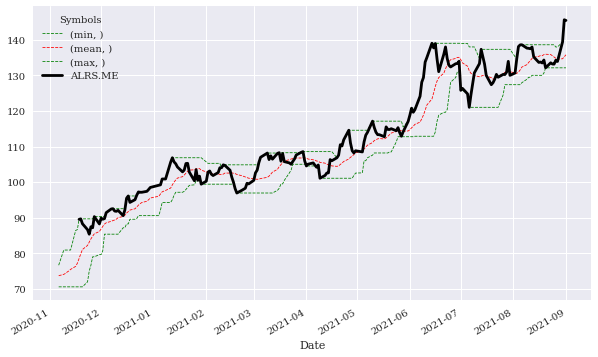

In [377]:
ax =ALRS_data[[ 'min','mean','max']].iloc[-208:].plot(figsize=(10,6),style=['g--' ,'r--','g--'], lw=0.8)
ALRS_data[sym].iloc[-200:].plot(ax=ax, lw=2.8,color='black'); 

## Кривая скользящей статистики

<AxesSubplot:xlabel='Date'>

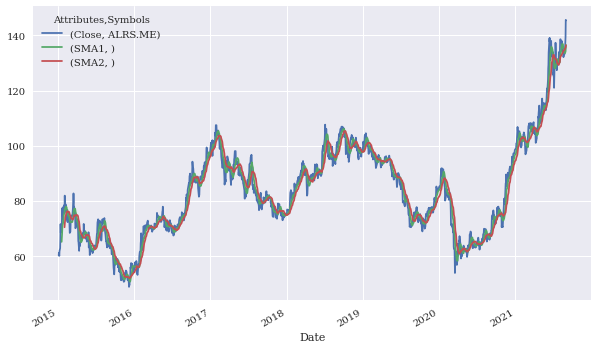

In [378]:
sym='Close'
ALRS_data['SMA1'] = ALRS_data[sym].rolling(window=10).mean()
ALRS_data['SMA2'] = ALRS_data[sym].rolling(window=20).mean()
ALRS_data[[sym,'SMA1','SMA2']].tail( )
ALRS_data[[sym,'SMA1','SMA2']].plot(figsize=(10, 6))

## Замена формата даты-времени на адату в американском стиле

In [312]:
# Замена формата даты-времени на адату в американском стиле
alrs['Дата']=pd.to_datetime(alrs['Дата'])
alrs

,Дата,Цена,Откр.,Макс.,Мин.,Объём,Изм. %
0,2021-03-12,127.73,130.27,130.60,126.50,"18,41M","-1,84%"
1,2021-02-12,130.13,128.32,130.50,126.73,"16,49M","1,01%"
2,2021-01-12,128.83,129.00,130.85,127.51,"27,16M","0,30%"
3,2021-11-30,128.44,123.70,129.49,122.55,"59,50M","2,76%"
4,2021-11-29,124.99,122.98,127.25,121.40,"29,04M","3,66%"
...,...,...,...,...,...,...,...
2520,2011-06-12,34.80,37.00,37.10,34.75,"831,10K","-6,20%"
2521,2011-05-12,37.10,38.00,41.98,36.70,"1,55M","-19,10%"
2522,2011-02-12,45.86,103.56,107.02,45.86,"1,90M","-40,01%"
2523,2011-01-12,76.44,64.50,76.44,64.50,"11,90K","40,00%"


<AxesSubplot:xlabel='Дата'>

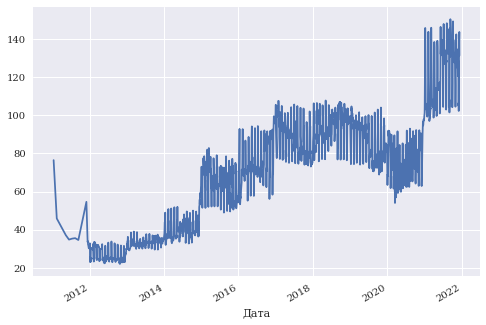

In [320]:
#Получим датасет за 5 лет и сделаем индексированием по датам
alrs=alrs.set_index(alrs.Дата)
# alrs2015=alrs['2015-1-1':]
# alrs2015
alrs.Цена.plot()

In [191]:
ttt=y.merge(preds, right_index=True,left_index=True)
ttt['ALRS.ME'].rename('orig')
ttt['ALRS.ME'].rename('orig')

Date
2016-09-01     75.699997
2016-09-02     76.529999
2016-09-05     77.949997
2016-09-06     81.250000
2016-09-07     80.370003
                 ...    
2021-08-26    134.259995
2021-08-27    133.929993
2021-08-30    139.419998
2021-08-31    145.639999
2021-09-01    145.460007
Freq: D, Name: orig, Length: 1259, dtype: float64

In [193]:
ttt.predicted_mean

Date
2016-09-01      0.055743
2016-09-02     75.755745
2016-09-05     76.608803
2016-09-06     78.047481
2016-09-07     81.382659
                 ...    
2021-08-26    133.284156
2021-08-27    134.274784
2021-08-30    134.021399
2021-08-31    139.655146
2021-09-01    145.941121
Freq: D, Name: predicted_mean, Length: 1259, dtype: float64